In [1]:
#!pip install datascience
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Random choice

In [2]:
coin = make_array('Heads', 'Tails')
coin

array(['Heads', 'Tails'], dtype='<U5')

In [6]:
np.random.choice(coin)

'Heads'

In [7]:
np.random.choice(coin, 10)

array(['Heads', 'Tails', 'Heads', 'Tails', 'Heads', 'Tails', 'Tails',
       'Tails', 'Heads', 'Tails'], dtype='<U5')

In [12]:
two_groups = make_array('treatment', 'control')
outcomes = np.random.choice(two_groups, 10)
outcomes

array(['control', 'control', 'treatment', 'treatment', 'control',
       'control', 'control', 'control', 'treatment', 'control'],
      dtype='<U9')

In [9]:
outcomes == 'control'

array([ True, False,  True,  True, False,  True, False, False,  True,
        True])

In [ ]:
#sum(outcomes)

In [13]:
sum(outcomes == 'control')

7

In [14]:
sum(outcomes == 'treatment')

3

## Conditional Statements

In [ ]:
x = 0
if x > 0:
    print('positive')
elif x < 0:
    print('negative')
else:
    print('zero')

In [15]:
def sign(x):
    if x > 0:
        return 'positive'
    elif x < 0:
        return 'negative'
    else:
        return 'zero'

In [16]:
sign(-3)

'negative'

In [17]:
numbers=make_array(-1,1,0)
numbers

array([-1,  1,  0], dtype=int64)

In [18]:
random_numbers=Table().with_column("RN",np.random.choice(numbers, 30))
random_numbers.with_column("Signs",random_numbers.apply(sign,"RN"))

RN,Signs
1,positive
0,zero
1,positive
1,positive
0,zero
0,zero
-1,negative
1,positive
1,positive
1,positive


## For Statements

In [19]:
np.arange(4)

array([0, 1, 2, 3])

In [20]:
for i in np.arange(4):
    print('iteration', i)

iteration 0
iteration 1
iteration 2
iteration 3


In [21]:
for things in ['a',"b",'c', 1, [1,2,3]]:
    print('This time through the for loop * things * is ', things, '.')

This time through the for loop * things * is  a .
This time through the for loop * things * is  b .
This time through the for loop * things * is  c .
This time through the for loop * things * is  1 .
This time through the for loop * things * is  [1, 2, 3] .


In [22]:
coin

array(['Heads', 'Tails'], dtype='<U5')

In [25]:
sum(np.random.choice(coin, 100) == 'Heads')

46

That was one experiment (flipping 100 times).  What if we wanted to repeat 10,000 experiments, and produce a table of results?

In [26]:
num_heads = make_array(sum(np.random.choice(coin, 100) == 'Heads'))
num_heads

array([46], dtype=int64)

In [27]:
num_heads = np.append(num_heads, sum(np.random.choice(coin, 100) == 'Heads'))
num_heads

array([46, 54], dtype=int64)

In [28]:
num_heads = make_array()
for i in np.arange(10000):
    num_heads = np.append(num_heads, sum(np.random.choice(coin, 100) == 'Heads'))
num_heads

array([59., 46., 51., ..., 41., 52., 43.])

In [29]:
len(num_heads)

10000

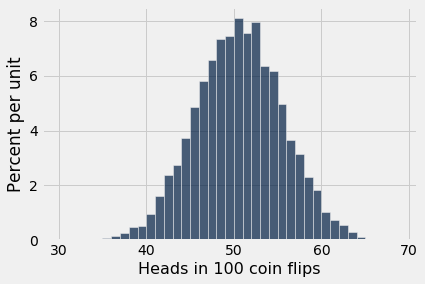

In [30]:
t = Table().with_column('Heads in 100 coin flips', num_heads)
t.hist(bins=np.arange(30, 70, 1))

In [ ]:
most = t.group('Heads in 100 coin flips')\
        .where('Heads in 100 coin flips', are.between(40, 60))
most.show()

In [ ]:
sum(most.column('count')) / t.num_rows * 100

In [ ]:
#noaccident that it's 95%

## Monty Hall

In [31]:
doors = make_array(1, 2, 3)
doors

array([1, 2, 3], dtype=int64)

In [32]:
prizes = make_array('car', 'first goat', 'second goat')
prizes

array(['car', 'first goat', 'second goat'], dtype='<U11')

In [38]:
np.random.choice(prizes, 3, replace=False)

array(['first goat', 'car', 'second goat'], dtype='<U11')

In [43]:
def setup():
    """Return a random game of Let's Make a Deal."""
    return Table().with_columns(
        'Door', doors,
        'Prize', np.random.choice(prizes, 3, replace=False)
    )

a_game = setup()
a_game

Door,Prize
1,car
2,first goat
3,second goat


In [44]:
def behind(game, door):
    """Return the prize behind a door."""
    return game.where('Door', door).column('Prize').item(0)

for door in doors:
    print('Behind door number', door, 'is the', behind(a_game, door))

Behind door number 1 is the car
Behind door number 2 is the first goat
Behind door number 3 is the second goat


In [45]:
def location(game, prize):
    """Return the door that hides a prize."""
    return game.where('Prize', prize).column('Door').item(0)

for prize in prizes:
    print('The', prize, 'is behind door number', location(a_game, prize))

The car is behind door number 1
The first goat is behind door number 2
The second goat is behind door number 3


In [46]:
a_guess = np.random.choice(doors)
a_guess

1

In [47]:
def expose(game, guess):
    """Return the door that Monty Hall opens to expose a goat."""
    guessed_prize = behind(game, guess)
    if guessed_prize == 'first goat':
        reveal = 'second goat'
    elif guessed_prize == 'second goat':
        reveal = 'first goat'
    else:
        reveal = np.random.choice(['first goat', 'second goat'])
    return location(game, reveal)

an_exposed_door = expose(a_game, a_guess)
print('The contestant picked door', a_guess, 'which hides the', behind(a_game, a_guess))
print('Monty Hall opens door', an_exposed_door, 'to expose the', behind(a_game, an_exposed_door))

The contestant picked door 1 which hides the car
Monty Hall opens door 2 to expose the first goat


In [48]:
def other(game, guess, exposed):
    """Return the door that is not the guess or the exposed."""
    return (1 + 2 + 3) - guess - exposed

the_remaining_door = other(a_game, a_guess, an_exposed_door)
print('The remaining door', the_remaining_door, 'hides the', behind(a_game, the_remaining_door))

The remaining door 3 hides the second goat


In [49]:
# A different way to create a table: provide the labels as a list
trials = Table(['trial', 'guess', 'exposed', 'remaining'])
for i in np.arange(1, 10000+1):
    game = setup()
    guess = np.random.choice(doors)
    exposed = expose(game, guess)
    remaining = other(game, guess, exposed)
    # Append one row to the table
    trials.append([i, behind(game, guess), behind(game, exposed), behind(game, remaining)])
    
trials

trial,guess,exposed,remaining
1,first goat,second goat,car
2,first goat,second goat,car
3,second goat,first goat,car
4,second goat,first goat,car
5,first goat,second goat,car
6,first goat,second goat,car
7,car,first goat,second goat
8,first goat,second goat,car
9,second goat,first goat,car
10,second goat,first goat,car


In [50]:
trials.group('guess')

guess,count
car,3328
first goat,3312
second goat,3360


In [51]:
trials.group('exposed')

exposed,count
first goat,5030
second goat,4970


In [52]:
trials.group('remaining')

remaining,count
car,6672
first goat,1658
second goat,1670


In [53]:
compare = trials.group('guess')\
                .relabeled('count', 'Guess Count')\
                .join('guess', trials.group('remaining'), 'remaining')\
                .relabeled('count', 'Remaining Count')\
                .relabeled('guess', 'Prize')
compare

Prize,Guess Count,Remaining Count
car,3328,6672
first goat,3312,1658
second goat,3360,1670


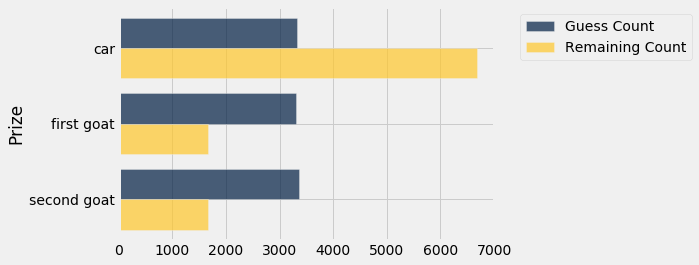

In [54]:
compare.barh('Prize')

## Probability

#### 3 Cards: Red, Green, Blue

What's the chance of GR (first G, second R) when sampling two cards without replacement?



A. 1/6

B. 1/3

C. 1/2

D. Something else


<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>




 

Outcomes are: RB RG BR BG GR GB
Probability is 1/6

What's the probability of drawing the red card either first or second when drawing without replacement?

#### Multiplication rule

P(GR) = P(drew G first)  ×  P(drew R second given that drew G first) 

      = 1/3  ×  1/2

#### Addition rule

What's the chance of one R and one G in any order when sampling two cards without replacement?













P(one R and one G in any order) = P(GR) + P(RG) = 1/6 + 1/6

#### Example: Flipping coin ten times 

P(at least one H) = 1 - P(no H) = 1 - P(TTTTTTTTTT) = 1 - (1/2)**10

In [ ]:
1-(1/2)**10

Roll a six-sided die 20 times. What's P(at least one 6)?

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

### Calculation

In [ ]:
1 - (5/6) ** 20

In [ ]:
rolls = np.arange(1, 51, 1)
at_least_one = Table().with_columns(
    'Rolls', rolls,
    'Chance of at least one 6', 1 - (5/6)**rolls
)
at_least_one.set_format(1, PercentFormatter(3))

In [ ]:
at_least_one.scatter('Rolls')

In [ ]:
at_least_one.where('Rolls', 20)